# Project

**Applied Statistics**

Martin Cusack

Student I.D: G00239124

***

## Introduction 

This Jupyter notebook contains all the work undertaken in completing the project for the Applied Statistics module.

The aim of this project is to carry out statistical investigations on the Plant Growth data set, which contains results from an experiment on plant growth comparing yields obtained under a control and two different treatment conditions. **[1]**

**[1]** [PlantGrowthR](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html)

Firstly, I will import all the packages required in order to complete the project.

In [1]:
# pandas
import pandas as pd

# numpy 
import numpy as np  

# scipy.stats for statistics.
import scipy.stats as ss
from scipy.stats import norm

# statsmodels for statistical modelling
import statsmodels as sm

# Plots.
import matplotlib.pyplot as plt

# statistical plots
import seaborn as sns

# ANOVA
from scipy.stats import f_oneway


Next, I will import the PlantGrowth data set (which is stored in a CSV file) and display it in a pandas dataframe so that investigations can be carried out on the data.

In [2]:
# import data set
df = pd.read_csv("Data\PlantGrowth.csv")

In [3]:
# summary statistics - display number of rows and columns
df.shape

(30, 3)

In [4]:
# summary statistics - describe the data set
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [5]:
# show all rows
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


As we can see from the above, the PlantGrowth R dataset contains 30 observations and 2 variables, **weight** and **group**. The weight column contains values representing the weight of each plant in grams. The group column contains three separate levels representing the type of treatment applied to each plant; Control (ctrl), Treatment 1 (trt1) and Treatment 2 (trt2). There are ten samples in each level.  

***

## Visualising the data

We can use the plotting functions within the seaborn package to gain a better visual understanding of the data. Below, I use the boxplot function **[2]** to illustrate the distribution or spread of weight across the three groups. Firstly, however, I will remove the **rownames** column, as this contains irrelevant data.

**[2]** [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [6]:
# drop rownames
df2 = df.drop(columns=['rownames'])

Text(0.5, 1.0, 'Distribution of Plant Weight by Group')

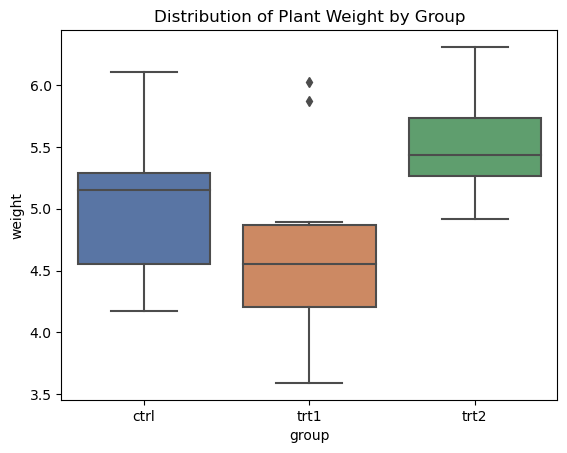

In [7]:
# seaborn boxplot
sns.boxplot(data=df2, x='group', y='weight', palette='deep')
plt.title('Distribution of Plant Weight by Group')

As we can see from the above boxplot, the median measurements are highest in the treatment 2 group and lowest in the treatment 1 group. The diamond-shaped markers above the treatment 1 group represent the two outlier measurements of 6.03 and 5.87.

***

## $t$-test

A $t$-test is a statistical test which is used to compare the means of two separate populations. It is often used when investigating to see whether small sample sizes are representative of a larger population.  The null hypothesis of the $t$ test is that "there is no difference between the mean of a sample and the population mean, and no difference between the means of two samples." **[3]**


There are a number of assumptions to consider when working with different types of statistical test.  
The $t$-test assumes that:
* The data are continuous.
* The sample data have been randomly sampled from a population.
* There is homogeneity of variance (i.e., the variability of the data in each group is similar).
* The distribution is approximately normal. **[4]**

In the below cell, I will use the scipy stats package to perform a t-test in order to determine whether there is a significant difference between the two treatment groups **trt1** and **trt2**. To do this, I will firstly extract from the pandas dataframe all the trt1 and trt2 values and store them as trt1 and trt2.


**[3]** [the $t$-test](bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests)

**[4]** [t-Test assumptions](jmp.com/en_ch/statistics-knowledge-portal/t-test.html)

***


In [8]:
# Extract all trt1 values and store as trt1

trt1 = df2.loc[df2['group'] == 'trt1', 'weight']

# Show
trt1

10    4.81
11    4.17
12    4.41
13    3.59
14    5.87
15    3.83
16    6.03
17    4.89
18    4.32
19    4.69
Name: weight, dtype: float64

In [9]:
# calculate mean and standard deviation of trt1 for comparison purposes
mean_trt1 = np.mean(trt1)
std_trt1 = np.std(trt1)
print(mean_trt1)
print(std_trt1)



4.661
0.7529468772762128


In [10]:
# Extract all trt2 values and store as trt2
trt2 = df2.loc[df2['group'] == 'trt2', 'weight']

# Show
trt2

20    6.31
21    5.12
22    5.54
23    5.50
24    5.37
25    5.29
26    4.92
27    6.15
28    5.80
29    5.26
Name: weight, dtype: float64

In [11]:
# calculate mean and standard deviation ot trt2 for comparison purposes
mean_trt2 = np.mean(trt2)
std_trt2 = np.std(trt2)
print(mean_trt2)
print(std_trt2)

5.526
0.4198618820517051


I can now run a t-test on the **trt1** and **trt2** samples to determine whether there is a significant difference between the two treatment groups.

In [13]:
# run t test
ss.ttest_ind(trt1, trt2)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

The p-value (or probability value) of a t-test denotes the likelihood of "obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct". **[5]** 

The null hypothesis in this case assumes that the means of the two groups are the same.  The above t-test produces a very low p-value result of 0.0075 (the threshold being 0.05) leading me to conclude that I should reject the null hypothesis in this instance. This is not a surprising result, as the means of the two groups (trt1 with a mean of 4.6 and trt2 with a mean of 5.5) are significantly different. This is also borne out by the boxplot visualisation from earlier which illustrates the differences in values between the two treatment groups, with trt2 having a significantly higher median value than trt1.

**[5]** [P value](en.wikipedia.org/wiki/P-value)

***

## ANOVA

ANOVA (or analysis of variance) is a statistical tool which tests "whether statistically significant differences exist between more than two samples". **[6]**  

According to Laerd Statistics: "Every time you conduct a $t$ test there is a chance that you will make a Type I error. This error is usually 5%." **[7]** 

It would be possible to conduct multiple $t$ tests on more than two samples, however your chances of making a Type 1 error (5%) would increase with every test by another 5% (test 2 would be 10%, test 3 would be 15%, et cetera). This is an unacceptable level of risk. Therefore, it is more prudent to run an ANOVA test when dealing with more than two samples or populations, since ANOVA exerts more control over the error rate and limits the probability of a Type 2 error.

When analysing the Plant Growth dataset, I will use one-way ANOVA. Testing with one-way ANOVA is particularly appropriate when dealing with groups containing only one categorical variable (e.g. the treatment group in the Plant Growth data set). **[8]**
***

#### Assumptions


Similar to the $t$ test, there are a number of assumptions to take into account when performing an ANOVA test.  These include:

* The data in each group should be independent of the data in other groups.
* Homogeneity of variances. (i.e. that the population variances in each group are equal.)
* The dependent variable is normally distributed in each group.



**[6]** [ANOVA](datatab.net/tutorial/anova)

**[7]** and **[9]** [One-way ANOVA](statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php)

**[8]** [One-way ANOVA - When and How to Use it](www.scribbr.com/statistics/one-way-anova/)

***


In the below cells, I will run an ANOVA test to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

In [15]:
# Extract all ctrl values and store as ctrl1
ctrl = df2.loc[df2['group'] == 'ctrl', 'weight']

# Show.
ctrl

0    4.17
1    5.58
2    5.18
3    6.11
4    4.50
5    4.61
6    5.17
7    4.53
8    5.33
9    5.14
Name: weight, dtype: float64

In [23]:
# calculate mean and standard deviation ot ctrl1 for comparison purposes
mean_ctrl = np.mean(ctrl)
std_ctrl = np.std(ctrl)
print(mean_ctrl)
print(std_ctrl)

5.032
0.5531690519181275


In [16]:
# Test with one-way ANOVA
f_stat, p_value = f_oneway(ctrl, trt1, trt2)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 4.846087862380136
P-value: 0.015909958325622895


As can be seen from the results after running one-way ANOVA, the p-value is significantly lower than the significance level of 0.05. This suggests that the mean of at least one of the treatment groups is significantly different from the others. Let's check the means and standard deviations of the three treatment groups again.

In [25]:
# means of the 3 treatment groups
print(mean_ctrl)
print(mean_trt1)
print(mean_trt2)

5.032
4.661
5.526


In [26]:
# standard deviations of the 3 treatment groups
print(std_ctrl)
print(std_trt1)
print(std_trt2)

0.5531690519181275
0.7529468772762128
0.4198618820517051


As we can see, there are quite significant differences between the means and standard deviations of the three treatment groups. This accounts for the low p-value after running one-way ANOVA.  Since the null hypothesis states that there are no significant differences between the group means, we reject the null hypothesis in this instance.

***

### References
***

**[1]**  *Results from an Experiment on Plant Growth.*  Vincent Arel Bundock. **vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html**

**[2]**  *seaborn.boxplot.*  Michael Waskom. **seaborn.pydata.org/generated/seaborn.boxplot.html**

**[3]** *the $t$-test.* The BMJ. **bmj.com/about-bmj/resources-readers/publications/statistics-square-one/7-t-tests**

**[4]** *t test assumptions*. JMP. **www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html**

**[5]** *P-value.* Wikipedia.  **en.wikipedia.org/wiki/P-value**

**[6]** *Analysis of Variance (ANOVA).* Datatab team.  **datatab.net/tutorial/anova**

**[7]**  *One-way ANOVA.* Laerd Statistics. **statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php**

**[8]** *One-way ANOVA - When and How to use it.*  Rebecca Bevans. **scribbr.com/statistics/one-way-anova/**

**[9]**  *One-way ANOVA.* Laerd Statistics. **statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php**


***
## End
***